<a href="https://colab.research.google.com/github/sitthatkaja/DPDM2023/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classification**

In [286]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **START**

- # **Data Preparation**

In [287]:
import pandas as pd
import numpy as np

# META DATA

Name		Data Type	Meas.	Description

Number of Instances: 690

Number of Attributes: 15 + class attribute

Attribute Information:

    A1:	b, a.
    A2:	continuous.
    A3:	continuous.
    A4:	u, y, l, t.
    A5:	g, p, gg.
    A6:	c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
    A7:	v, h, bb, j, n, z, dd, ff, o.
    A8:	continuous.
    A9:	t, f.
    A10:	t, f.
    A11:	continuous.
    A12:	t, f.
    A13:	g, p, s.
    A14:	continuous.
    A15:	continuous.
    A16: +,-         (class attribute)

Missing Attribute Values:
    37 cases (5%) have one or more missing values.  The missing
    values from particular attributes are:

    A1:  12
    A2:  12
    A4:   6
    A5:   6
    A6:   9
    A7:   9
    A14: 13

Class Distribution
  
    +: 307 (44.5%)
    -: 383 (55.5%)


- ✔️ (1) Set header = None and Set Columns names

In [288]:
col_name = ['a1', 'a2',	'a3',	'a4',	'a5',	'a6',	'a7',	'a8',	'a9','a10','a11', 'a12',	'a13',	'a14',	'a15',	'a16']

In [289]:
credit = pd.read_csv('/content/drive/MyDrive/DPDM23_DATA/crx.data', header = None, names=col_name) # (1) Set header = None  ### ไม่มีชื่อ Cloums / หัวตาราง (Because there is no column name)
print(credit.shape)
credit.head()

(690, 16)


,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [290]:
credit = credit[['a3','a8',	'a9','a10','a11', 'a12',	'a13','a15',	'a16']]

In [291]:
credit.isnull().any()

a3     False
a8     False
a9     False
a10    False
a11    False
a12    False
a13    False
a15    False
a16    False
dtype: bool

Preprocessing

In [292]:
credit = credit.replace({'t':1,'f':0,'g':1,'p':2,'s':3,'+':1,'-':0})
credit

,a3,a8,a9,a10,a11,a12,a13,a15,a16
0,0.000,1.25,1,1,1,0,1,0,1
1,4.460,3.04,1,1,6,0,1,560,1
2,0.500,1.50,1,0,0,0,1,824,1
3,1.540,3.75,1,1,5,1,1,3,1
4,5.625,1.71,1,0,0,0,3,0,1
...,...,...,...,...,...,...,...,...,...
685,10.085,1.25,0,0,0,0,1,0,0
686,0.750,2.00,0,1,2,1,1,394,0
687,13.500,2.00,0,1,1,1,1,1,0
688,0.205,0.04,0,0,0,0,1,750,0


#try Simple ML

In [293]:
import numpy as np

In [294]:
np.random.seed(seed = 1)

In [295]:
a = np.random.randint(2, size = len(credit))

In [296]:
a

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,

In [297]:
train = credit [a==1]
train.shape

(324, 9)

In [298]:
test = credit [a==0]
test.shape

(366, 9)

import

In [299]:
from sklearn.tree import DecisionTreeClassifier

define

In [300]:
Dtree1 = DecisionTreeClassifier(random_state=0)

train

In [301]:
X_train = train.iloc[:,:-1]

In [302]:
y_train = train.iloc[:,-1]

In [303]:
Dtree1.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [304]:
from sklearn import tree

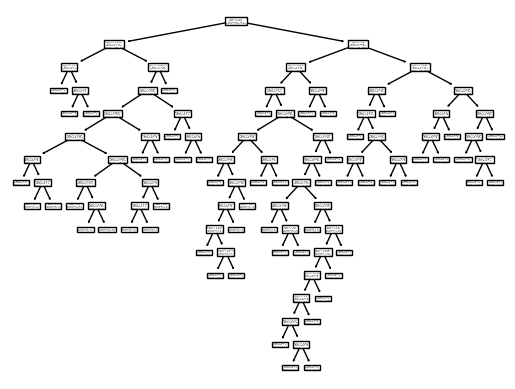

In [305]:
tree.plot_tree(Dtree1);

test

In [306]:
X_test = test.iloc[:,:-1]
y_test = test.iloc[:,-1]

In [307]:
y_predict = Dtree1.predict(X_test)

In [308]:
from sklearn.metrics import accuracy_score

In [309]:
accuracy_score(y_test, y_predict)

0.825136612021858

## Set parameter

import

In [310]:
from sklearn.tree import DecisionTreeClassifier

Deine

In [311]:
Dtree2 = DecisionTreeClassifier(random_state=0,max_depth=4)

Train

In [312]:
Dtree2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

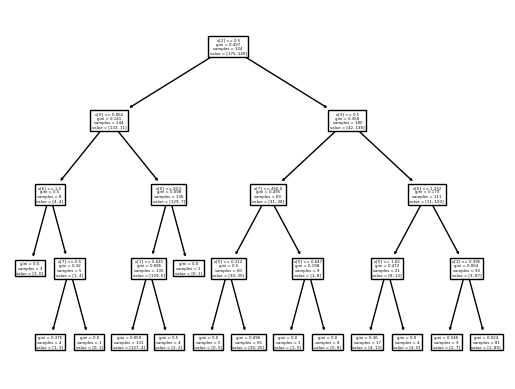

In [313]:
tree.plot_tree(Dtree2);

Test

In [314]:
y_predict2 = Dtree2.predict(X_test)

In [315]:
accuracy_score(y_test, y_predict2)

0.8579234972677595

# HW5 Build a decision tree model which hass better than 0.86 and describe about parameters you set

Deine

In [316]:
Dtree3 = DecisionTreeClassifier(random_state=0,max_depth=5,min_samples_split = 12)

Train

In [317]:
Dtree3.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=12, random_state=0)

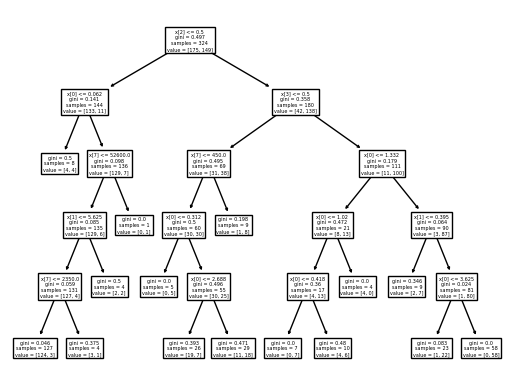

In [318]:
tree.plot_tree(Dtree3);

test

In [319]:
y_predict3 = Dtree3.predict(X_test)

In [320]:
accuracy_score(y_test, y_predict3)

0.8797814207650273

# HW6 Build 5 Classification as folllows;

- decision tree with 3 model
- Naive bayes 1 Model
- Unique Technique 1 Model

By using A dataset of Credit

In [321]:
credit

,a3,a8,a9,a10,a11,a12,a13,a15,a16
0,0.000,1.25,1,1,1,0,1,0,1
1,4.460,3.04,1,1,6,0,1,560,1
2,0.500,1.50,1,0,0,0,1,824,1
3,1.540,3.75,1,1,5,1,1,3,1
4,5.625,1.71,1,0,0,0,3,0,1
...,...,...,...,...,...,...,...,...,...
685,10.085,1.25,0,0,0,0,1,0,0
686,0.750,2.00,0,1,2,1,1,394,0
687,13.500,2.00,0,1,1,1,1,1,0
688,0.205,0.04,0,0,0,0,1,750,0


# Simple ML

In [322]:
np.random.seed(seed = 123)

In [323]:
a = np.random.randint(2, size = len(credit))

In [324]:
a

array([0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,

In [325]:
Ntrain = credit [a==1]
Ntrain.shape

(361, 9)

In [326]:
Ntest = credit [a==0]
Ntest.shape

(329, 9)

Set Train and Test

In [327]:
NX_train = Ntrain.iloc[:,:-1]
Ny_train = Ntrain.iloc[:,-1]

In [328]:
NX_test = Ntest.iloc[:,:-1]
Ny_test = Ntest.iloc[:,-1]

## decision tree with 3 model

## 1st Model

##Import

In [329]:
from sklearn.tree import DecisionTreeClassifier

## define

In [330]:
NDtree1 = DecisionTreeClassifier()

## Train

In [331]:
NDtree1.fit(NX_train,Ny_train)

DecisionTreeClassifier()

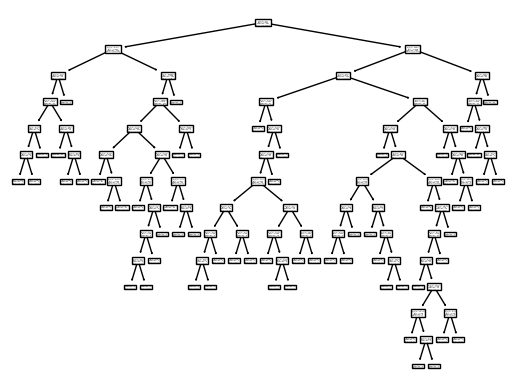

In [332]:
from sklearn import tree
tree.plot_tree(NDtree1);

## Test

In [333]:
ny_predict = NDtree1.predict(NX_test)

In [334]:
from sklearn.metrics import accuracy_score
accuracy_score(Ny_test, ny_predict)

0.78419452887538

---
## 2nd Model

## define

In [335]:
NDtree2 = DecisionTreeClassifier(max_depth=5)

## Train

In [336]:
NDtree2.fit(NX_train,Ny_train)

DecisionTreeClassifier(max_depth=5)

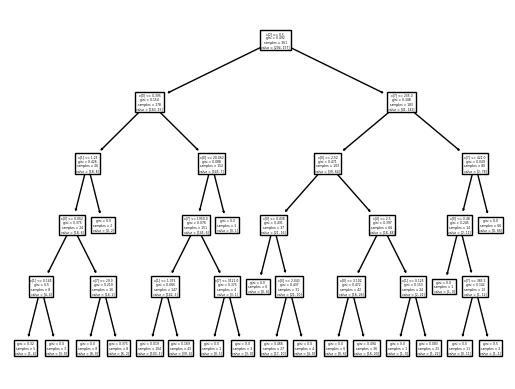

In [337]:
tree.plot_tree(NDtree2);

## Test

In [338]:
ny_predict2 = NDtree2.predict(NX_test)

In [339]:
accuracy_score(Ny_test, ny_predict2)

0.8237082066869301

---
## 3rd Model

## define

In [340]:
NDtree3 = DecisionTreeClassifier(random_state=40,max_depth=5, criterion ='entropy' ,min_samples_split=35,min_samples_leaf=2)

## Train

In [341]:
NDtree3.fit(NX_train,Ny_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2,
                       min_samples_split=35, random_state=40)

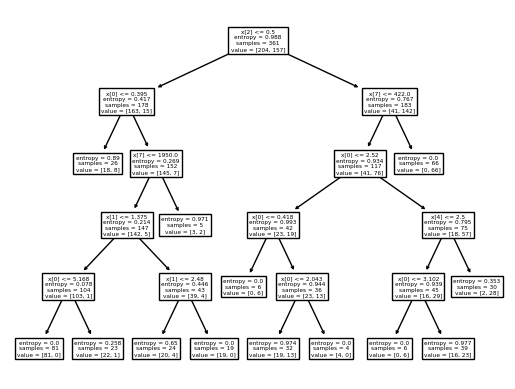

In [342]:
tree.plot_tree(NDtree3);

## Test

In [343]:
ny_predict3 = NDtree3.predict(NX_test)

In [344]:
accuracy_score(Ny_test, ny_predict3)

0.851063829787234

---

## Naive bayes 1 Model

## Import

In [345]:
from sklearn.naive_bayes import GaussianNB

## Define

In [346]:
gnb = GaussianNB()

## Train

In [347]:
gnb.fit(NX_train, Ny_train)

GaussianNB()

##Test

In [348]:
y_predictNB = gnb.predict(NX_test)

In [349]:
accuracy_score(Ny_test, y_predictNB)

0.7629179331306991

---
## Unique Technique 1 Model


## Gradient Boosting

In [350]:
credit

,a3,a8,a9,a10,a11,a12,a13,a15,a16
0,0.000,1.25,1,1,1,0,1,0,1
1,4.460,3.04,1,1,6,0,1,560,1
2,0.500,1.50,1,0,0,0,1,824,1
3,1.540,3.75,1,1,5,1,1,3,1
4,5.625,1.71,1,0,0,0,3,0,1
...,...,...,...,...,...,...,...,...,...
685,10.085,1.25,0,0,0,0,1,0,0
686,0.750,2.00,0,1,2,1,1,394,0
687,13.500,2.00,0,1,1,1,1,1,0
688,0.205,0.04,0,0,0,0,1,750,0


## Import

In [351]:
from sklearn.ensemble import GradientBoostingClassifier

Define

In [352]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

## Model

In [353]:
clf.fit(NX_train, Ny_train)

GradientBoostingClassifier(random_state=42)

## Train

In [354]:
y_predictGB = clf.predict(NX_test)

In [355]:
accuracy = accuracy_score(Ny_test, y_predictGB)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8601823708206687
